In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np

from mopet import mopet
from synchronization import plots
from synchronization import runner
from synchronization import constants

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Visualization of Parameter Explorations


# Synaptic Weights Exploration Results

In this notebook the exploration results are visualized.
Idea is to use only 2-3 cells per exploration and as little code as possible.
Exploration are visualized by using abstracted functions, and we just use the name of the exploration to load the results from `mopet`.

There should only be minimal modification to individual explorations, we mostly stick to plot collections offered by `plots`.

In [7]:
ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params={},
    hdf_filename=f"{constants.MODELS_PATH}/exploration.h5",
    exploration_name="synaptic_weights"
)
ex.load_results(all=True)

100%|██████████| 400/400 [00:32<00:00, 12.47it/s]


In [8]:
ex.df["freq_diff"] = np.abs(ex.df["peak_freq"] - ex.df["peak_freq_2"])
axis_names = list(ex.explore_params.keys())
param_X = axis_names[0]
param_Y = axis_names[1]

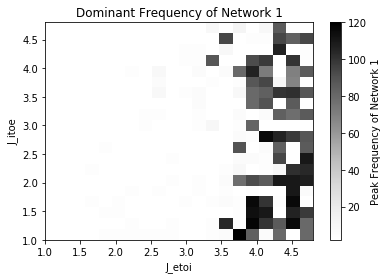

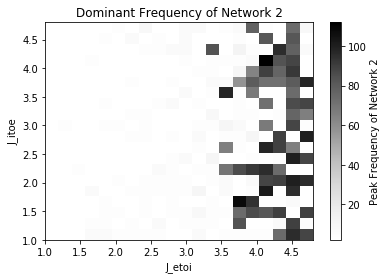

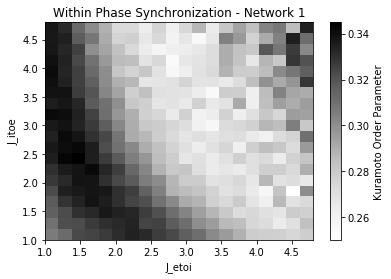

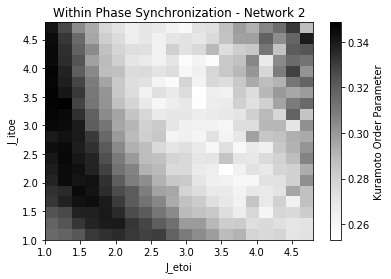

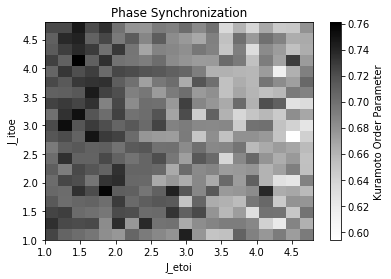

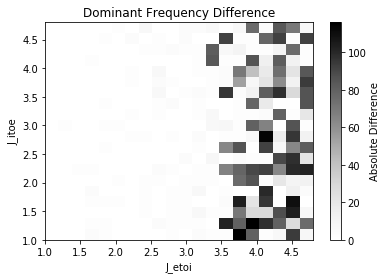

In [14]:
plots.plot_exploration(ex=ex, param_X=param_X, param_Y=param_Y)

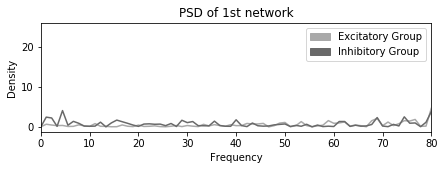

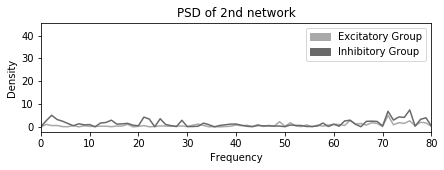

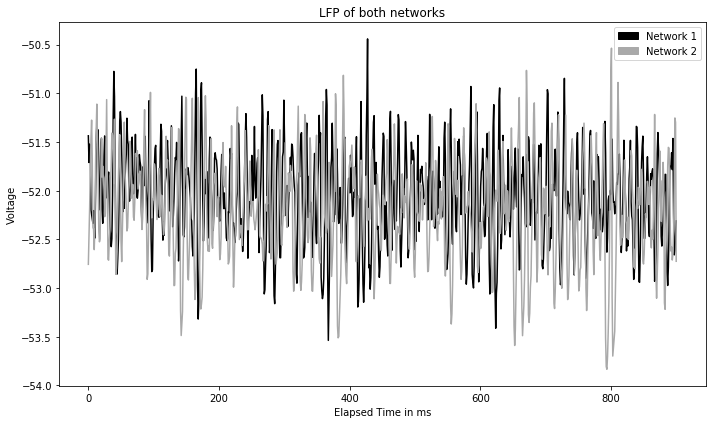

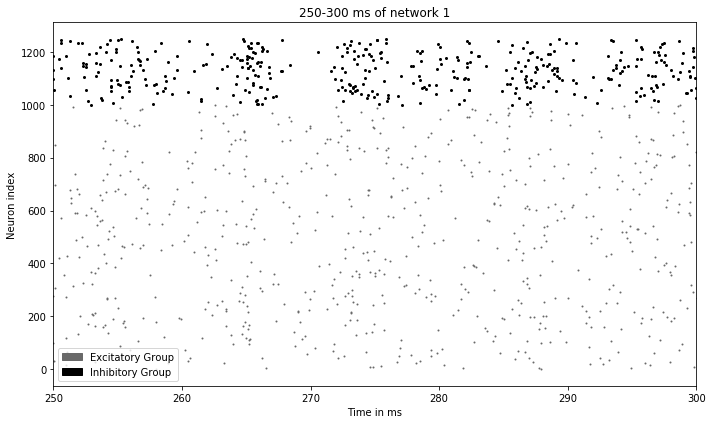

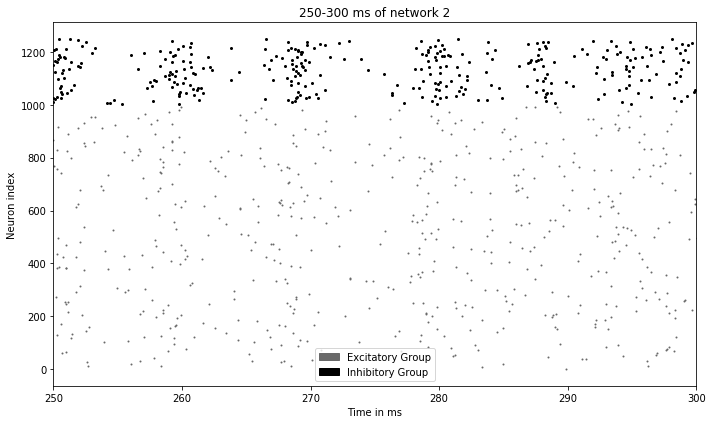

In [12]:
# for single run
# TODO: get results for specific parameter configuration!
plots.plot_results(ex.results[300])

# Experiment XY